Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math



Load Data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Rakamin/Clicked Ads Dataset.csv")

df.sample(50)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
822,822,73.21,30,357093590.0,252.60,Laki-Laki,5/12/2016 20:57,Yes,Semarang,Jawa Tengah,Travel
934,934,78.41,33,387580690.0,248.23,Laki-Laki,6/3/2016 4:51,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Travel
61,61,85.84,34,452582620.0,192.93,Laki-Laki,6/15/2016 5:30,No,Denpasar,Bali,Health
827,827,43.49,45,335778240.0,124.67,Perempuan,6/14/2016 12:08,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Finance
933,933,36.73,34,327161380.0,149.79,Laki-Laki,6/27/2016 1:56,Yes,Tangerang Selatan,Banten,Food
97,97,39.94,41,454490330.0,156.30,Perempuan,1/8/2016 22:47,Yes,Surabaya,Jawa Timur,Electronic
171,171,71.84,47,532024290.0,199.79,Laki-Laki,5/8/2016 22:47,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Furniture
96,96,45.72,36,157311560.0,154.02,Laki-Laki,4/19/2016 15:14,Yes,Serang,Banten,Travel
804,804,53.92,41,180173630.0,125.46,Laki-Laki,6/12/2016 11:17,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Bank
44,44,80.47,25,402637480.0,204.86,Perempuan,2/11/2016 13:26,No,Makassar,Sulawesi Selatan,Otomotif


In [ ]:
#Drop unnecessary column
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [ ]:
# change data type Timestamp to datetime
df['Timestamp']=df['Timestamp'].astype('datetime64[ns]')

Separate column into categorical and numerical column

In [ ]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
num_cols=df.select_dtypes(exclude='object').columns.tolist()


Deskritif Statistik

In [ ]:
df[cat_cols].describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [ ]:
df[num_cols].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
# cek value pada kolom categorical
for col in cat_cols:
  print(f'''Value Count Kolom {col}:''')
  print(df[col].value_counts())
  print()

Value Count Kolom Male:
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value Count Kolom Clicked on Ad:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value Count Kolom city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

Value Count Kolom province:
Daerah Khusus Ibukota Jakart

Univariate Analysis

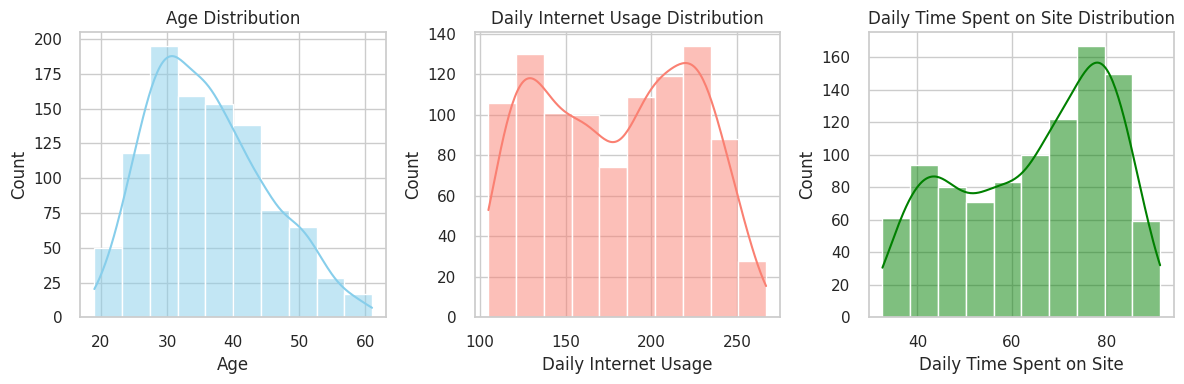

In [ ]:
#Univariate analysis
# Set style for seaborn
sns.set(style="whitegrid")

# Plot Age distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')

# Plot Daily Internet Usage
plt.subplot(1, 3, 2)
sns.histplot(df['Daily Internet Usage'], bins=10, kde=True, color='salmon')
plt.title('Daily Internet Usage Distribution')

# Plot Daily Time Spent on Site
plt.subplot(1, 3, 3)
sns.histplot(df['Daily Time Spent on Site'], bins=10, kde=True, color='green')
plt.title('Daily Time Spent on Site Distribution')

# Show plots
plt.tight_layout()
plt.show()

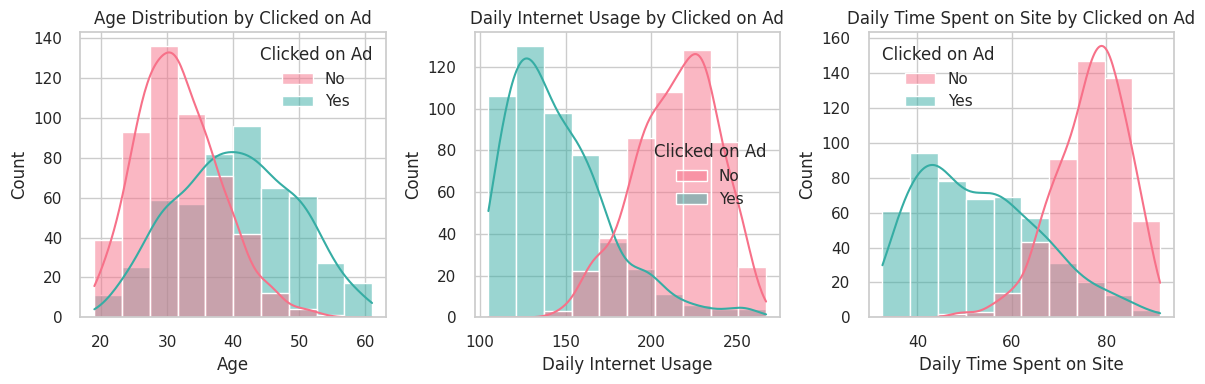

In [ ]:
# Set style for seaborn
sns.set(style="whitegrid")

# Plot Age distribution by Clicked on Ad
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df, x='Age', hue='Clicked on Ad', bins=10, kde=True, palette='husl')
plt.title('Age Distribution by Clicked on Ad')

# Plot Daily Internet Usage by Clicked on Ad
plt.subplot(1, 3, 2)
sns.histplot(df, x='Daily Internet Usage', hue='Clicked on Ad', bins=10, kde=True, palette='husl')
plt.title('Daily Internet Usage by Clicked on Ad')

# Plot Daily Time Spent on Site by Clicked on Ad
plt.subplot(1, 3, 3)
sns.histplot(df, x='Daily Time Spent on Site', hue='Clicked on Ad', bins=10, kde=True, palette='husl')
plt.title('Daily Time Spent on Site by Clicked on Ad')

# Show plots
plt.tight_layout()
plt.show()

Boxplot To Cek Outlier

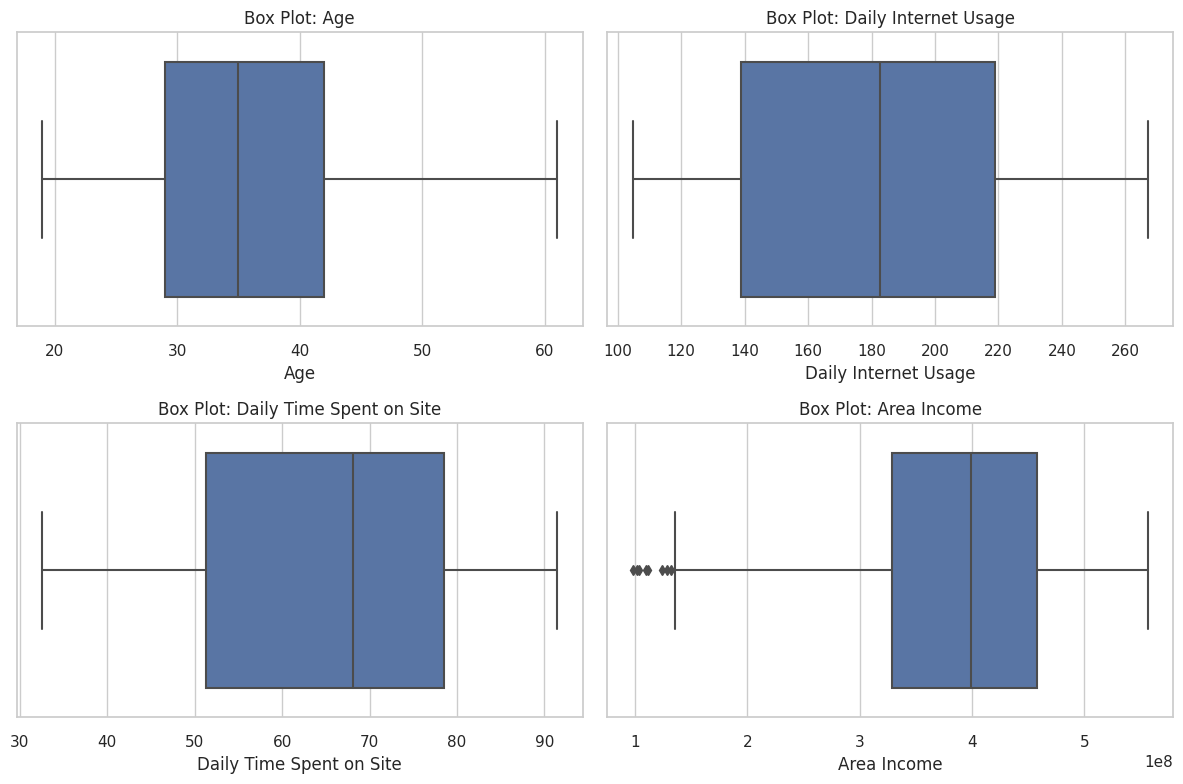

In [ ]:
# Set style for seaborn
sns.set(style="whitegrid")

# Create box plots for each column
plt.figure(figsize=(12, 8))

# Box plot for Age
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Box Plot: Age')

# Box plot for Daily Internet Usage
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Daily Internet Usage'])
plt.title('Box Plot: Daily Internet Usage')

# Box plot for Daily Time Spent on Site
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Daily Time Spent on Site'])
plt.title('Box Plot: Daily Time Spent on Site')

# Box plot for Area Income
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Area Income'])
plt.title('Box Plot: Area Income')

# Show plots
plt.tight_layout()
plt.show()

Bivariate Analysis

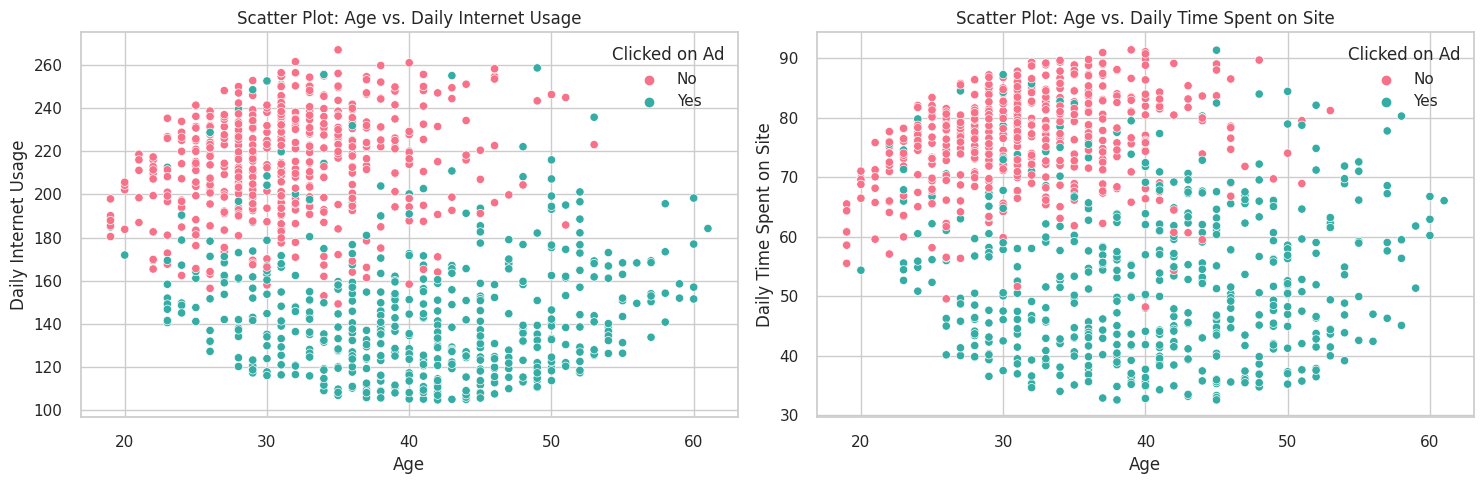

In [ ]:
# Set style for seaborn
sns.set(style="whitegrid")

# Bivariate analysis: Scatter plots for continuous variables
plt.figure(figsize=(15, 5))

# Scatter plot Age vs. Daily Internet Usage
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Daily Internet Usage', data=df, hue='Clicked on Ad', palette='husl')
plt.title('Scatter Plot: Age vs. Daily Internet Usage')

# Scatter plot Age vs. Daily Time Spent on Site
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Daily Time Spent on Site', data=df, hue='Clicked on Ad', palette='husl')
plt.title('Scatter Plot: Age vs. Daily Time Spent on Site')

# Show plots
plt.tight_layout()
plt.show()

Multivariate Analysis

<ipython-input-26-791102a70226>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


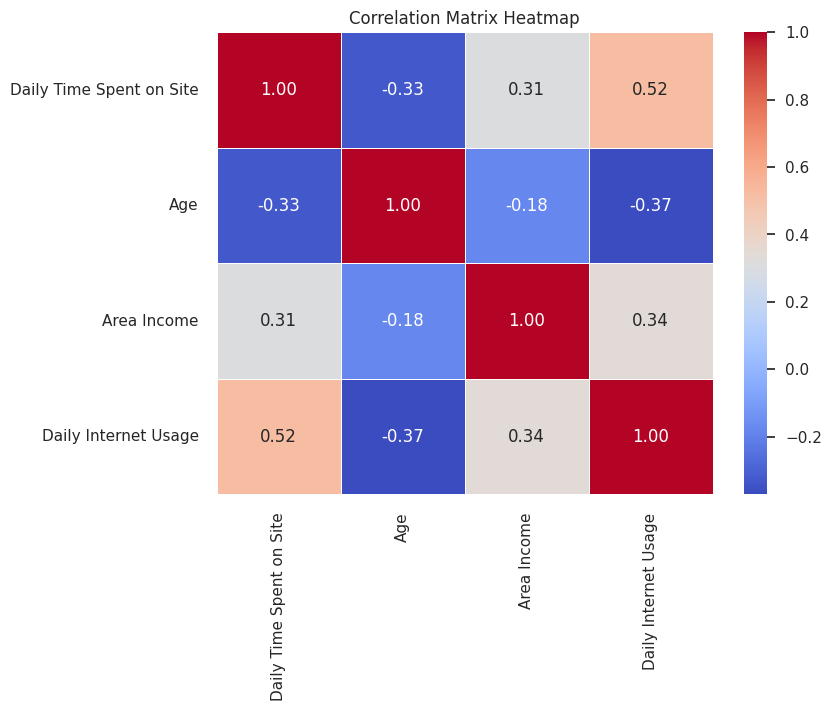

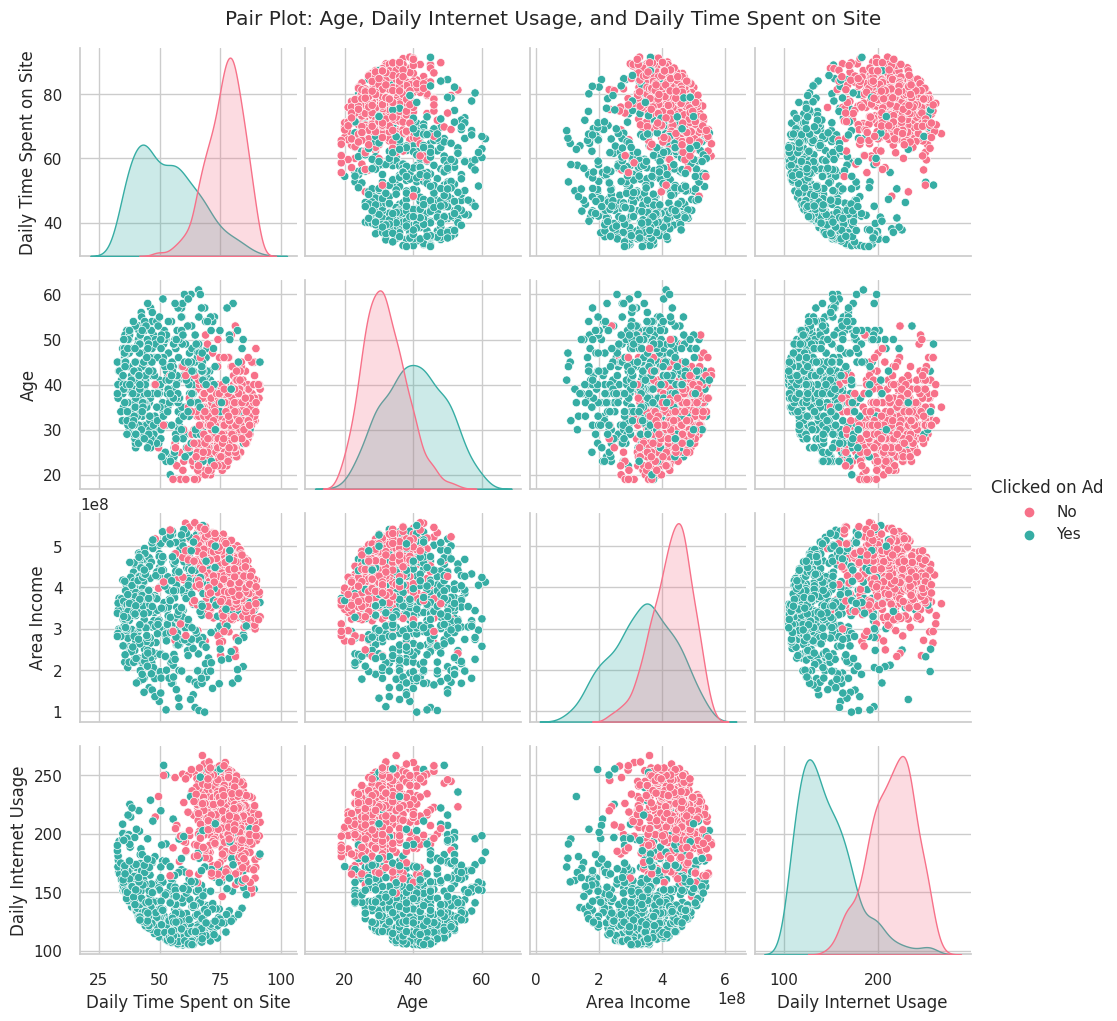

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set style for seaborn
sns.set(style="whitegrid")

# Plot correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')

# Multivariate analysis: Pair plot
sns.pairplot(df, hue='Clicked on Ad', palette='husl')
plt.suptitle('Pair Plot: Age, Daily Internet Usage, and Daily Time Spent on Site', y=1.02)

# Show plots
plt.show()

## Data Cleaning & Data Preprocessing

Cek Missing Value

In [ ]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

Terdapat 4 kolom yang terdapat missing value, 3 kolom numerikal akan kita  impute menggunakan teknik MICE sedangkan kolom kategorikal kita impute dengan modus


In [ ]:
df['Male'].fillna(df['Male'].mode()[0], inplace=True)

In [ ]:
col_to_impute =['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

In [ ]:
#impute missing value categorical column using MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=100, max_iter=10)
df[col_to_impute]=imputer.fit_transform(df[col_to_impute])

In [ ]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

 Cek Duplicate Data

In [ ]:
sum(df.duplicated())

0

Rename some of columns

In [ ]:
#Rename Kolom male menjadi kolom gender
df=df.rename(columns ={'Male' : 'Gender'} )

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance


In [ ]:
# view total rows before filtered
print(f'Jumlah baris sebelum memfilter outlier adalah {df.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df))
skewed_cols = ['Area Income']
for col in skewed_cols:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

# view total rows after filtered
df_copy = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier adalah {df.shape[0]}')

Jumlah baris sebelum memfilter outlier adalah 1000
Jumlah baris setelah memfilter outlier adalah 1000


<Axes: xlabel='Area Income', ylabel='Density'>

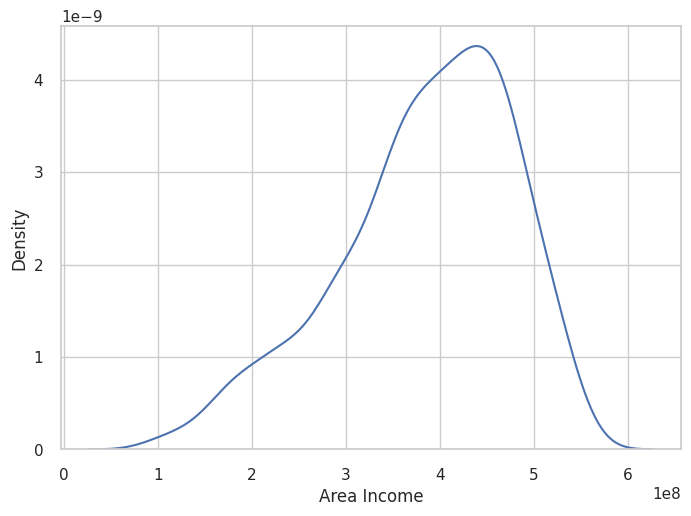

In [ ]:
# Distribusi Area Income (nilai asli)
sns.kdeplot(df['Area Income'])

Berdasarkan boxplot dan hasil plot diatas didapat bahwa kolom Area Income cenderung ke arah kiri atau left skew. Maka akan dilakukan Standardizing/normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df['Area Income'] = MinMaxScaler().fit_transform(df['Area Income'].values.reshape(len(df),1))


In [ ]:
#cek after normalization
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
762,53.63,54,0.554866,126.29,Laki-Laki,2016-01-08 18:13:00,Yes,Pakanbaru,Riau,Otomotif
641,81.29,28,0.293834,219.72,Perempuan,2016-02-15 20:41:00,No,Tangerang,Banten,Otomotif
159,75.55,36,0.904564,159.24,Perempuan,2016-05-09 02:58:00,Yes,Bandung,Jawa Barat,Food
582,40.04,27,0.520740,161.58,Perempuan,2016-05-08 10:25:00,Yes,Cimahi,Jawa Barat,Food
312,75.55,22,0.425341,169.40,Perempuan,2016-02-19 07:29:00,Yes,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Finance
618,35.55,39,0.574102,151.18,Perempuan,2016-01-13 20:38:00,Yes,Semarang,Jawa Tengah,Health
513,59.13,44,0.542522,106.04,Laki-Laki,2016-06-09 17:11:00,Yes,Pakanbaru,Riau,Bank
662,48.26,50,0.451640,122.45,Laki-Laki,2016-06-18 22:31:00,Yes,Balikpapan,Kalimantan Timur,Bank
300,69.97,28,0.626755,250.00,Perempuan,2016-05-22 00:01:00,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Health
436,56.39,27,0.379013,248.12,Laki-Laki,2016-03-23 21:06:00,No,Pakanbaru,Riau,Electronic


Feature Encoding

In [ ]:
df['Gender'].value_counts()


Perempuan    521
Laki-Laki    479
Name: Gender, dtype: int64

In [ ]:
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

In [ ]:
mapping_gender = {
    'Laki-Laki':0,
    'Perempuan':1
}
df['Gender'] = df['Gender'].map(mapping_gender)

mapping_click_on_ads = {
    'Yes': 1,
    'No': 0
}
df['Clicked on Ad'] = df['Clicked on Ad'].map(mapping_click_on_ads)

In [ ]:
# Encoding categorical using library LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.city=encoder.fit_transform(df.city)
df.province=encoder.fit_transform(df.province)
df.category=encoder.fit_transform(df.category)
df.sample(10, random_state=50)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
316,75.84,21,0.527433,186.98,1,2016-02-07 07:41:00,0,6,3,0
459,79.82,26,0.572868,223.28,0,2016-07-17 22:04:00,0,17,15,4
854,75.03,34,0.332395,255.57,1,2016-05-29 18:12:00,1,17,15,8
11,83.07,37,0.740506,230.87,0,2016-05-08 08:10:00,0,1,10,9
978,71.40,30,0.888592,166.31,1,2016-05-24 17:07:00,0,14,2,6
727,81.17,30,0.659652,231.91,0,2016-06-03 07:00:00,0,12,2,5
771,64.38,19,0.588404,180.47,0,2016-05-27 05:23:00,0,25,5,9
563,62.26,37,0.977155,166.19,1,2016-05-26 15:40:00,0,14,2,9
541,75.65,39,0.763878,247.90,0,2016-05-30 02:34:00,0,23,4,5
747,49.13,32,0.413825,120.49,1,2016-01-29 00:45:00,1,5,3,3


Encode Timestamp

In [ ]:
import datetime

# Convert timestamp column to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract features from timestamps
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['second'] = df['Timestamp'].dt.second


# Delete original column
df=df.drop('Timestamp', axis=1)

# Display the resulting DataFrame
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,city,province,category,year,month,day,hour,minute,second
0,68.95,35,0.730472,256.09,1,0,13,2,5,2016,3,27,0,53,0
1,80.23,31,0.831375,193.77,0,0,8,0,4,2016,4,4,1,39,0
2,69.47,26,0.699200,236.50,1,0,25,5,1,2016,3,13,20,35,0
3,74.15,29,0.623160,245.89,0,0,4,9,7,2016,1,10,2,31,0
4,68.37,35,0.914568,225.58,1,0,17,15,3,2016,6,3,3,36,0


Define Target

In [ ]:
# separate feature and target
X = df.drop(['Clicked on Ad'], axis=1, inplace=False)
y = df['Clicked on Ad'].values

Split Train Test

In [ ]:
from sklearn.model_selection import train_test_split
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# check the shape of X_train and X_test

print(f'Jumlah data latih terdiri dari {len(X_train)} baris')
print(f'Jumlah data uji terdiri dari {len(X_test)} baris')

Jumlah data latih terdiri dari 700 baris
Jumlah data uji terdiri dari 300 baris


##Modeling

Model Assignment

In [ ]:
# import library untuk modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold

In [ ]:
# Model assignment
rfc = RandomForestClassifier(random_state=45)
etc = ExtraTreesClassifier(random_state=45)
gbc = GradientBoostingClassifier(random_state=45)
bgc = BaggingClassifier(random_state=45)
xgb = XGBClassifier(eval_metric='error',random_state=45)
abc = AdaBoostClassifier()


# Assign model to a list
models = [rfc, etc, gbc, bgc, xgb, abc]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV

Cross Validation

In [ ]:
# Cross validation for each model
rfc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [ ]:
# List of score per model

cv_result = [rfc_score, etc_score, gbc_score, bgc_score, xgb_score, abc_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
RandomForestClassifier,0.970,0.970,0.955,0.940,0.955
ExtraTreesClassifier,0.965,0.960,0.970,0.945,0.945
GradientBoostingClassifier,0.970,0.960,0.975,0.930,0.940
BaggingClassifier,0.955,0.965,0.965,0.940,0.955
XGBClassifier,0.960,0.945,0.965,0.940,0.950
AdaBoostClassifier,0.955,0.960,0.970,0.930,0.945


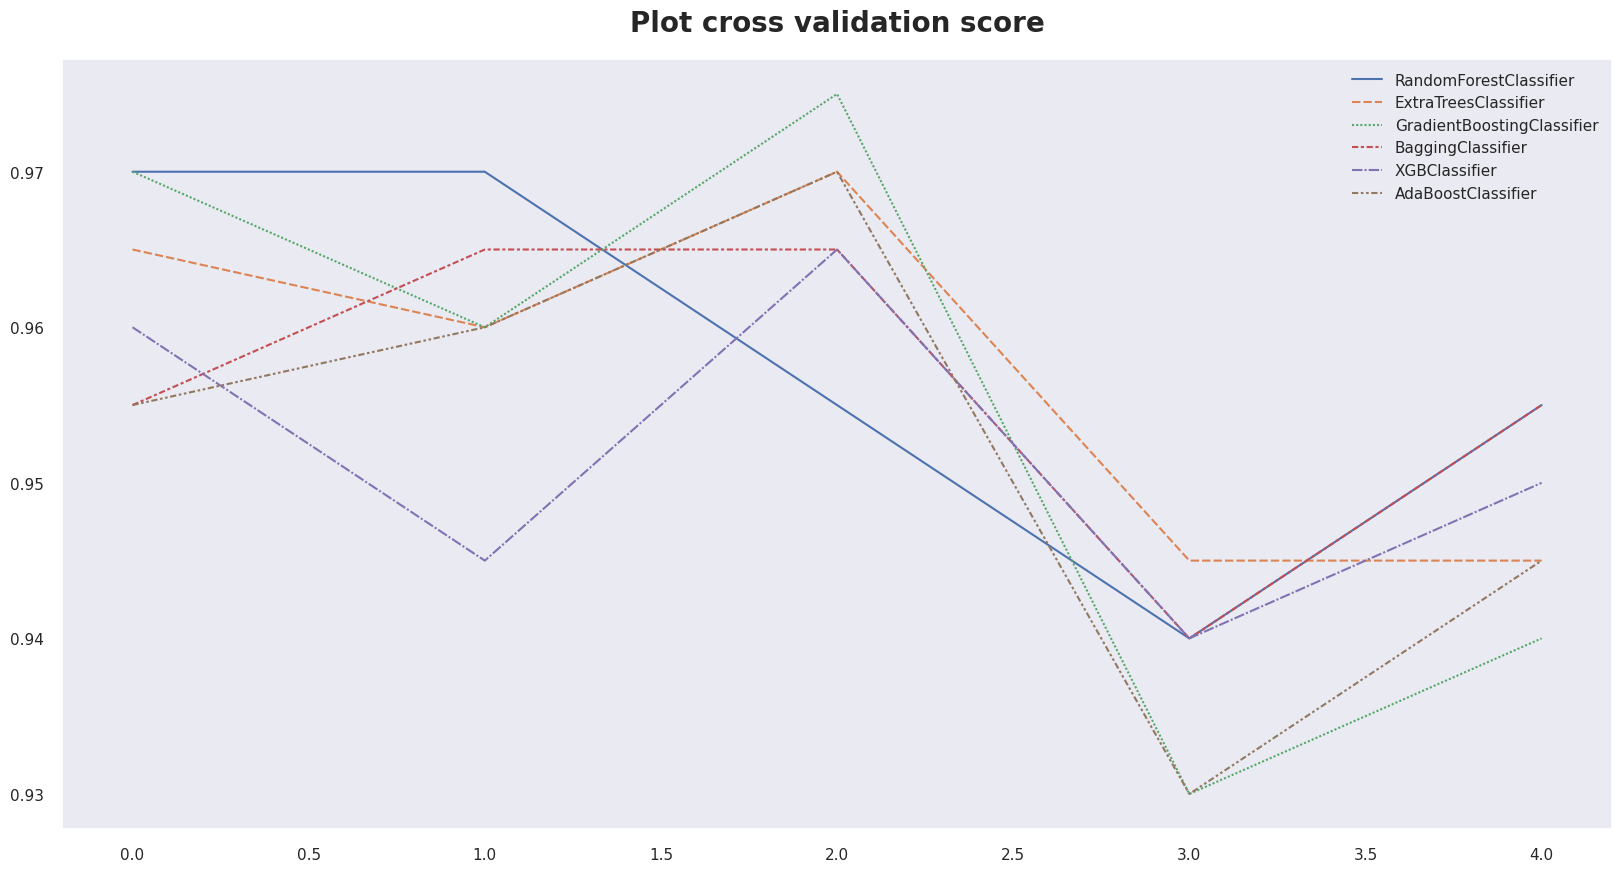

In [ ]:
# Plot cross validation score
sns.set_style('dark')
plt.figure(figsize=(20,10))
plt.title('Plot cross validation score',fontsize=20, fontweight='bold', pad=20)
sns.lineplot(data=df_cv_result.T)
plt.show()

In [ ]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [ ]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In [ ]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
RandomForestClassifier,0.958,0.011225
ExtraTreesClassifier,0.957,0.010296
BaggingClassifier,0.956,0.009165
GradientBoostingClassifier,0.955,0.017321
XGBClassifier,0.952,0.009274
AdaBoostClassifier,0.952,0.013638


Fit and Evaluation

In [ ]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train, y_train)
    # accuracy for training set
    train_score.append(model.score(X_train, y_train))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

In [ ]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
ExtraTreesClassifier,1.000000,0.960000,0.040000
GradientBoostingClassifier,1.000000,0.953333,0.046667
RandomForestClassifier,1.000000,0.946667,0.053333
XGBClassifier,1.000000,0.946667,0.053333
BaggingClassifier,0.991429,0.943333,0.048095
AdaBoostClassifier,0.987143,0.953333,0.033810


In [ ]:
# Calculate accuracy, precision, recall, f1-score, and roc-auc-score
def eval(model,X_train,X_test,y_train,y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    train_score = round((model.score(X_train, y_train) * 100), 2)
    test_score = round((model.score(X_test, y_test) * 100), 2)
    prec_score = round((precision_score(y_test, y_pred)) * 100, 2)
    rec_score = round((recall_score(y_test, y_pred)) * 100, 2)
    f1 = round(f1_score(y_test, y_pred)*100, 2)
    train_roc_auc = round((roc_auc_score(y_train, y_pred_proba_train[:, 1]) * 100), 2)
    test_roc_auc = round((roc_auc_score(y_test, y_pred_proba[:, 1]) * 100), 2)

    return (train_score,test_score,prec_score,rec_score,f1,train_roc_auc,test_roc_auc)

A=[]
for i in models:
    A.append(eval(i,X_train,X_test,y_train,y_test))

In [ ]:
model_eval = pd.DataFrame(A,index=model_name)
model_eval = model_eval.rename(columns={0: 'Training Accuracy', 1: 'Test Accuracy', 2:'Precision Score', 3:'Recall Score', 4:'F1 Score', 5:'roc_auc (train-proba)', 6:'roc_auc (test-proba)'})
model_eval = model_eval.sort_values(['Precision Score'], ascending=[False])
model_eval = model_eval.reset_index()
model_eval = model_eval.rename(columns={'index': 'Model'})
model_eval


,Model,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score,roc_auc (train-proba),roc_auc (test-proba)
0,ExtraTreesClassifier,100.00,96.00,98.63,93.51,96.00,100.00,98.55
1,AdaBoostClassifier,98.71,95.33,96.67,94.16,95.39,100.00,98.43
2,BaggingClassifier,99.14,94.33,96.60,92.21,94.35,99.99,97.80
3,GradientBoostingClassifier,100.00,95.33,96.05,94.81,95.42,100.00,98.28
4,RandomForestClassifier,100.00,94.67,96.00,93.51,94.74,100.00,98.58
5,XGBClassifier,100.00,94.67,96.00,93.51,94.74,100.00,98.43


Cross Validation for Some Metrics

In [ ]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)

# Cross validation for each model
rfc_score = cross_validate(models[0], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[1], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[2], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[3], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[4], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[5], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [ ]:
cv_result = [rfc_score, etc_score, gbc_score, bgc_score, xgb_score, abc_score]

# Average score for each metrics

df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_precision'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,ExtraTreesClassifier,0.355498,0.034561,0.965714,0.982135,0.947950,0.964296
1,RandomForestClassifier,0.493279,0.032032,0.962857,0.970767,0.953747,0.961907
2,XGBClassifier,0.060154,0.012807,0.957143,0.962605,0.950849,0.956364
3,GradientBoostingClassifier,0.457725,0.010934,0.957143,0.962085,0.950890,0.956262
4,AdaBoostClassifier,0.176280,0.025916,0.952857,0.958864,0.945010,0.951639
5,BaggingClassifier,0.052913,0.010431,0.948571,0.953776,0.942277,0.947575


Based On CrossValidation, So I choosed Random Forest for Modeling

In [ ]:
# Fit classifier
rfc.fit(X_train, y_train)

# predict test set
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)
y_pred_proba_train = rfc.predict_proba(X_train)

# Calculate accuracy, precision, recall, and f1-score
train_score = round((rfc.score(X_train, y_train) * 100), 2)
test_score = round((rfc.score(X_test, y_test) * 100), 2)
prec_score = round((precision_score(y_test, y_pred)) * 100, 2)
rec_score = round((recall_score(y_test, y_pred)) * 100, 2)
f1 = round(f1_score(y_test, y_pred)*100, 2)
train_roc_auc = round((roc_auc_score(y_train, y_pred_proba_train[:, 1]) * 100), 2)
test_roc_auc = round((roc_auc_score(y_test, y_pred_proba[:, 1]) * 100), 2)

print('Training Accuracy : {}%'.format(train_score))
print('Test Accuracy : {}%'.format(test_score))
print('Precision Score : {}%'.format(prec_score))
print('Recall Score : {}%'.format(rec_score))
print('F1 Score : {}%'.format(f1))
print('roc_auc (train-proba) : {}%'.format(train_roc_auc))
print('roc_auc (test-proba) : {}%'.format(test_roc_auc))

Training Accuracy : 100.0%
Test Accuracy : 94.67%
Precision Score : 96.0%
Recall Score : 93.51%
F1 Score : 94.74%
roc_auc (train-proba) : 100.0%
roc_auc (test-proba) : 98.58%


In [ ]:
pd.DataFrame({
    'train_acc':[train_score],
    'test_acc':[test_score],
    'precision':[prec_score],
    'recall':[rec_score],
    'f1-score':[f1],
    'roc_auc (train-proba)':[train_roc_auc],
    'roc_auc (test-proba)':[test_roc_auc]}, index=['Default RFC'])

,train_acc,test_acc,precision,recall,f1-score,roc_auc (train-proba),roc_auc (test-proba)
Default RFC,100.0,94.67,96.0,93.51,94.74,100.0,98.58


Hypertuning Parameter

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}


GridSearchCV Parameter

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)


RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=50)


In [ ]:

model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       150
           1       0.94      0.97      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Random Search CV Parameter

In [ ]:

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


RandomForestClassifier(max_depth=3, max_features='log2', max_leaf_nodes=9)


In [ ]:

model_random = RandomForestClassifier(max_depth=3,
                                      max_features='log2',
                                      max_leaf_nodes=6,
                                      n_estimators=100)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       150
           1       0.94      0.97      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



##Model Evaluation

Confusion Matrix

[[140   6]
 [ 10 144]]


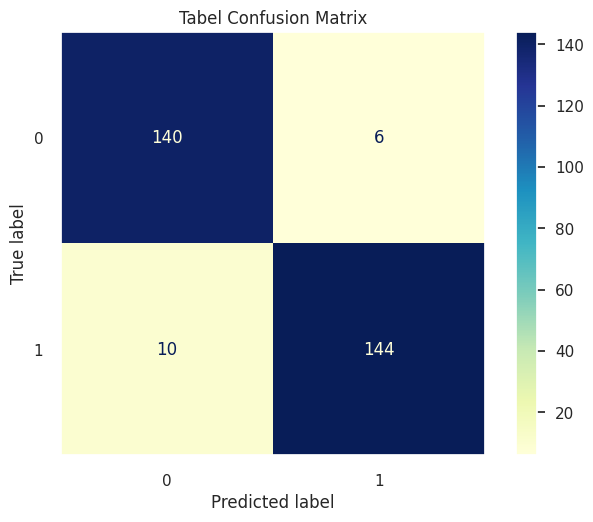

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='YlGnBu')
plt.title('Tabel Confusion Matrix')
plt.show()

In [ ]:
# Classification report model
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       146
           1       0.96      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
# Precision Recall Curve
y_pred = rfc.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=rfc.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=rfc.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

ROC AUC Score is : 0.9857676570005337


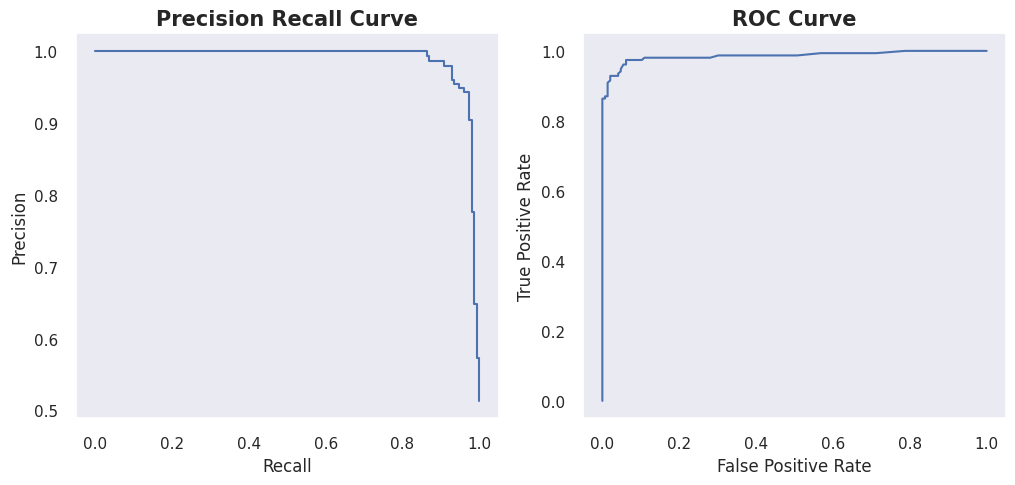

In [ ]:
# roc auc score
auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score is : {auc_score}')

# Plotting Precision Recall and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve', fontsize=15, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=15, fontweight='bold')
plt.show()

Feature Importance

In [ ]:
feature_importance = pd.DataFrame({
    'Features':X.columns,
    'Importance':rfc.feature_importances_}).sort_values('Importance', ascending=False)

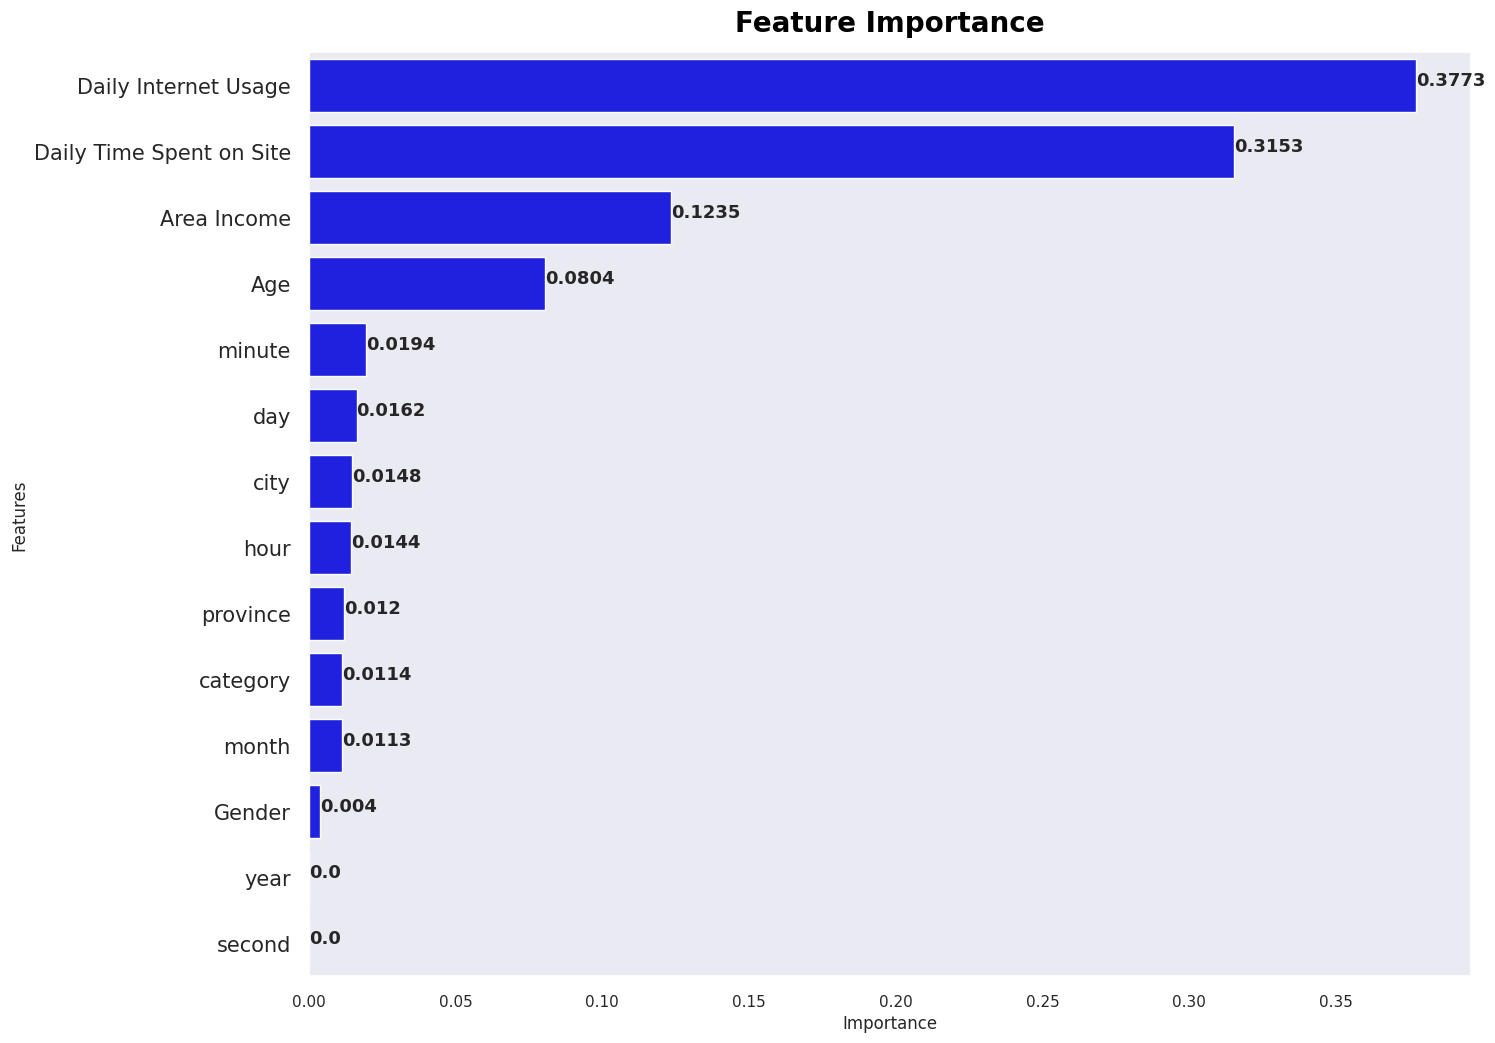

In [ ]:
plt.figure(figsize=(15, 12))
sns.barplot(data=feature_importance, x='Importance', y='Features', color='blue')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(feature_importance['Importance'])
y = list(feature_importance['Features'])

plt.title('Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()